## 6.4: Supervised Machine Learning: Regression


### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\Lukman\Desktop\FEMINA CF\Data Immerssion\Achievement6\Analyzing Flight Delays'

In [4]:
# Import Data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','flightdelay_cleaned.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Flight_Date', 'Airline', 'Airline_DOT_Code',
       'Airline_Code', 'Flight_Number', 'Origin_Airport', 'Origin_City',
       'Destination_Airport', 'Destination_City', 'Scheduled_Departure_Time',
       'Actual_Departure_Time', 'Departure_Delay', 'Scheduled_Arrival_Time',
       'Actual_Arrival_Time', 'Arrival_Delay', 'Cancelled',
       'Cancellation_Code', 'Diverted', 'Scheduled_Elapsed_Time',
       'Actual_Elapsed_Time', 'Air_Time', 'Distance', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay'],
      dtype='object')

In [6]:
df.shape


(2920058, 28)

In [7]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                  0
Flight_Date                 0
Airline                     0
Airline_DOT_Code            0
Airline_Code                0
Flight_Number               0
Origin_Airport              0
Origin_City                 0
Destination_Airport         0
Destination_City            0
Scheduled_Departure_Time    0
Actual_Departure_Time       0
Departure_Delay             0
Scheduled_Arrival_Time      0
Actual_Arrival_Time         0
Arrival_Delay               0
Cancelled                   0
Cancellation_Code           0
Diverted                    0
Scheduled_Elapsed_Time      0
Actual_Elapsed_Time         0
Air_Time                    0
Distance                    0
Carrier_Delay               0
Weather_Delay               0
NAS_Delay                   0
Security_Delay              0
Late_Aircraft_Delay         0
dtype: int64

### 3. Data prep for regression analysis 

Create a scatter plot to inspect the relationship between Distance and Departure_Delay.

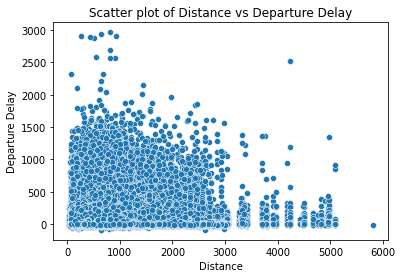

In [8]:
sns.scatterplot(x='Distance', y='Departure_Delay', data=df)
plt.title('Scatter plot of Distance vs Departure Delay')
plt.xlabel('Distance')
plt.ylabel('Departure Delay')
plt.show()

Hypothesis: There is a linear relationship between the flight distance and the departure delay.

In [9]:
# Reshape variables
X = df['Distance'].values.reshape(-1, 1)
y = df['Departure_Delay'].values


Split the data into training and test sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4. Regression analysis

In [15]:
# Create regression model

regression = LinearRegression()

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

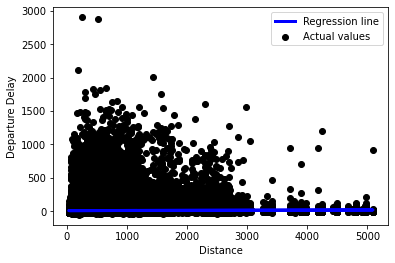

In [18]:
# Create a plot that shows the regression line from the model on the test set.
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_predicted, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Distance')
plt.ylabel('Departure Delay')
plt.legend()
plt.show()


In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.00188238]
Mean squared error:  2428.7426772761305
R2 score:  0.0004017008377518172


In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.0,8.692727
1,-4.0,9.637680
2,-1.0,10.657927
3,-5.0,12.551598
4,-6.0,12.457479
5,-1.0,10.000978
6,-8.0,9.931330
7,-1.0,10.304041
8,-1.0,10.665457
9,-5.0,8.997672


The results of the linear regression analysis suggest that there is a very weak relationship between the distance of a flight and its departure delay. The slope of the regression line is very small, indicating that for each unit increase in distance, the departure delay increases only slightly. The Mean Squared Error (MSE) is quite high, indicating that the predictions are not very close to the actual values. The R2 score is close to zero, suggesting that the distance explains almost none of the variability in departure delay.

##### Compare how the regression fits the training set

In [22]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.00188238]
Mean squared error:  2407.7170724702905
R2 score:  0.0005107334993085244


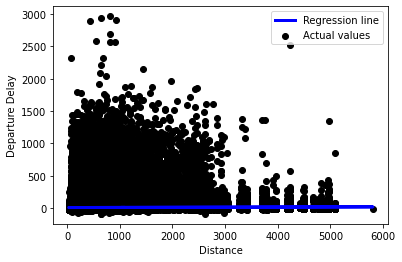

In [25]:
# Visualizing the training set results.

# Create a plot that shows the regression line from the model on the test set.
plt.scatter(X_train, y_train, color='black', label='Actual values')
plt.plot(X_train, y_predicted_train, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Distance')
plt.ylabel('Departure Delay')
plt.legend()
plt.show()
plt.savefigure()

Thoughts on Model Performance
Given the results, it's clear that a simple linear regression model using distance as the only predictor is not sufficient to accurately predict departure delays. The very low R2 score indicates that the model does not fit the data well and other variables should be considered to improve the model.

Possible Data Bias
There could be several biases in the data:

Sampling Bias: If the data is not representative of all flights (e.g., if it includes only specific airlines, airports, or times of the year), the model may not generalize well.

Measurement Errors: Inaccuracies in the recorded departure delays or distances could also affect the model's performance.